<p style = "font-size : 28px ; color: blue;font-family:TimesNewRoman">
    <b>Problem Statement</b></p>

* Nowadays, the number of people using flights has increased significantly.
* It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. We will try to use machine learning to solve this problem.
* This can help airlines by predicting what prices they can maintain. 

<p style = "font-size : 28px ; color: blue;font-family:TimesNewRoman">
    <b>Attribute Information</b></p>

* Airline: The name of the airline.

* Date_of_Journey: The date of the journey.

* Source: The source from which the service begins.

* Destination: The destination where the service ends.

* Route: The route taken by the flight to reach the destination.

* Dep_Time: The time when the journey starts from the source.

* Arrival_Time: Time of arrival at the destination.

* Duration: Total duration of the flight.

* Total_Stops: Total stops between the source and destination.

* Additional_Info: Additional information about the flight.

* Price: The price of the ticket

# Library & Data Import

In [45]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [46]:
df=pd.read_excel(r'C:\Users\DEll\Desktop\Data_Science  Studies\PYTHON\PROJECT\Flight Prediction\Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Pre-Processing

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [48]:
df.shape

(10683, 11)

In [49]:
# checking null values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [50]:
#Removing null values from dataset
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [51]:
df.drop([9039],axis=0,inplace=True)

In [52]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:ylabel='Price'>

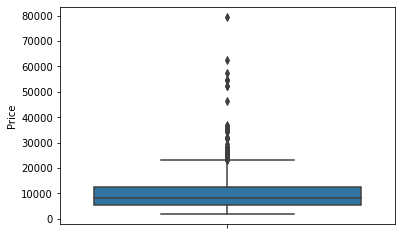

In [53]:
#Treating outlier
sns.boxplot(y='Price',data=df)

In [54]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr

In [55]:
df['Price']=np.where(df['Price']>upper_limit,upper_limit,df['Price'])

## Feature Engineering

### Date_of_Journey	
 Let's convert Date_of_Journey to its appropriate format as datetime with regards to day and month.

In [56]:
df['Date']=df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
df['Month']=df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
df['Year']=df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [57]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [58]:
#Now we can drop the Date_of_Journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

<br>
Let's do the same for the other relative columns
<br>

## Dep_time

In [59]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [60]:
#Now we can drop the Dep_Time
df.drop(['Dep_Time'],axis=1,inplace=True)

## Arrival_time

In [61]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [62]:
#Now we can drop the Dep_Time
df.drop(['Arrival_Time'],axis=1,inplace=True)

## Duration

In [63]:
duration=df['Duration'].str.split(' ',expand=True) 
duration[1].fillna('00m',inplace=True)   
df['Duration_hr']=duration[0].apply(lambda x: x[:-1])
df['Duration_min']=duration[1].apply(lambda x: x[:-1])

In [64]:
df['Duration_hr']=df.Duration_hr.astype(int)
df['Duration_min']=df.Duration_min.astype(int)

In [65]:
#Now we can drop the Duration
df.drop('Duration',axis=1,inplace=True)

## Route

In [66]:
df['Route_1']=df['Route'].str.split('→').str[0]
df['Route_2']=df['Route'].str.split('→').str[1]
df['Route_3']=df['Route'].str.split('→').str[2]
df['Route_4']=df['Route'].str.split('→').str[3]
df['Route_5']=df['Route'].str.split('→').str[4]
df.drop('Route',axis=1,inplace=True)

In [67]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    df[i].fillna('None',inplace=True)

## Total_Stops

In [68]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [69]:
df['Total_Stops']=df.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})


## Airline vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

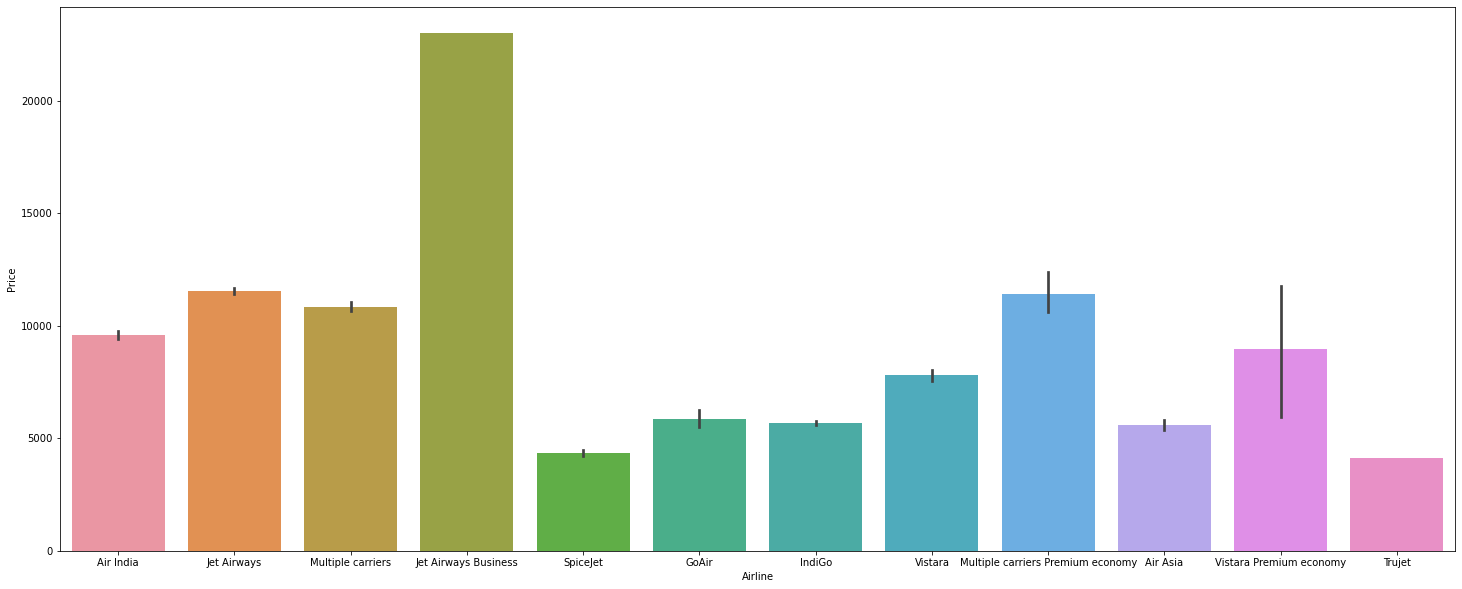

In [70]:
plt.figure(figsize=(25,10))
sns.barplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

* Jet Airways Business has the highest price whereas Trujet has the lowest.


## Source vs Price

In [71]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

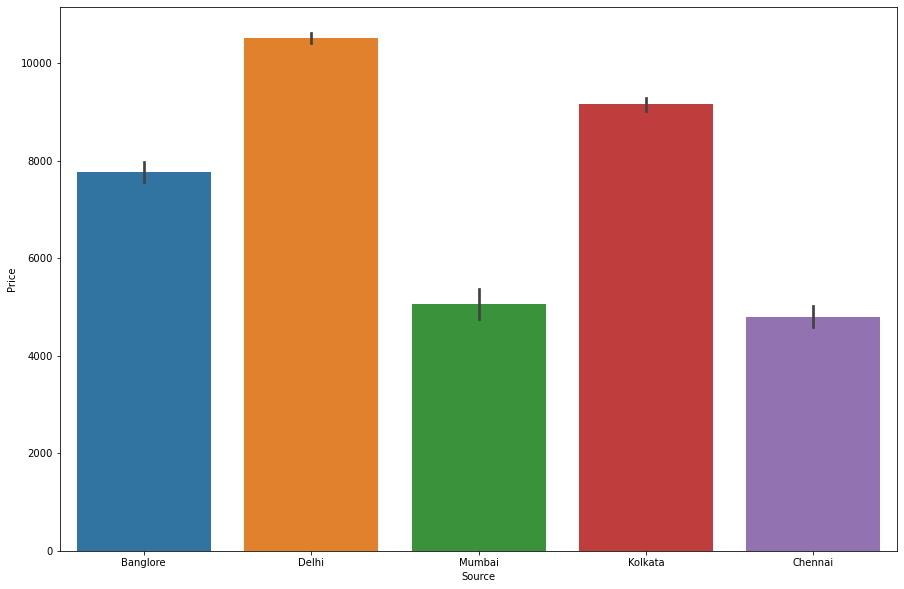

In [72]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show


## Destination vs Price

In [73]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [74]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

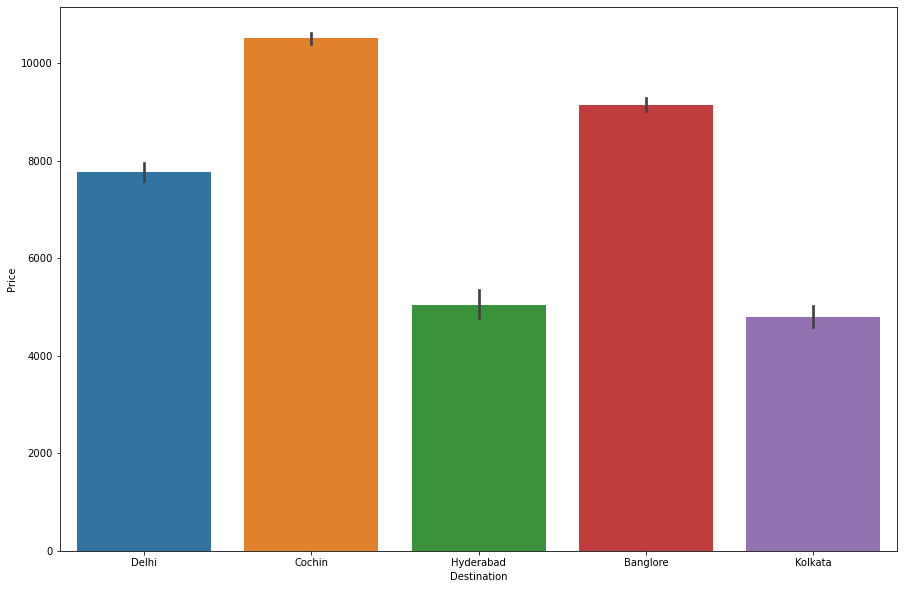

In [75]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

### Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable


In [76]:
quan_var=df.select_dtypes(include=np.number)
quan_var.head()

,Total_Stops,Price,Date,Month,Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,0,3897.0,24,3,2019,22,20,1,10,2,50
1,2,7662.0,1,5,2019,5,50,13,15,7,25
2,2,13882.0,9,6,2019,9,25,4,25,19,0
3,1,6218.0,12,5,2019,18,5,23,30,5,25
4,1,13302.0,1,3,2019,16,50,21,35,4,45


In [77]:
qual_var=df.select_dtypes(include='object')
qual_var.head()

,Airline,Source,Destination,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,Delhi,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,Delhi,No info,BLR,NAG,DEL,None,None


### Converting qualitative Variable into number

In [78]:
qual_var=qual_var.apply(LabelEncoder().fit_transform)
qual_var.head()

,Airline,Source,Destination,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,2,8,0,13,29,13,5
1,1,3,0,8,2,25,1,3,5
2,4,2,1,8,3,32,4,5,5
3,3,3,0,8,2,34,3,13,5
4,3,0,2,8,0,34,8,13,5


In [79]:
#Combining the both quantitative & qualitative variable
df_new=pd.concat([qual_var,quan_var],axis=1)
df_new.head()

,Airline,Source,Destination,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Stops,Price,Date,Month,Year,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,3,0,2,8,0,13,29,13,5,0,3897.0,24,3,2019,22,20,1,10,2,50
1,1,3,0,8,2,25,1,3,5,2,7662.0,1,5,2019,5,50,13,15,7,25
2,4,2,1,8,3,32,4,5,5,2,13882.0,9,6,2019,9,25,4,25,19,0
3,3,3,0,8,2,34,3,13,5,1,6218.0,12,5,2019,18,5,23,30,5,25
4,3,0,2,8,0,34,8,13,5,1,13302.0,1,3,2019,16,50,21,35,4,45


In [80]:
x = df_new.drop('Price', axis = 1)
y = df_new[['Price']]
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.80,random_state=2396)

In [107]:
Model = RandomForestRegressor(n_estimators=20, 
                               criterion="mse",
                               max_depth=6,  
                               min_samples_split=120,
                               min_samples_leaf=30,
                              max_features="auto")
                             

Model.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto',
                      min_samples_leaf=30, min_samples_split=120,
                      n_estimators=20)

In [ ]:
# Importance Features
imp = pd.Series(data=RF_Model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [108]:
y_predict=Model.predict(x_test)
r2_score(y_test,y_predict)

0.8090420804607921

In [113]:
import pickle
# open a file, where you want to store the data
file = open('Model.pkl', 'wb')

# dump information to that file
pickle.dump(Model, file)